In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/TuhinBanerjee/Downloads/model-t4/train/train.csv")
df.columns

Index(['sample_time', 'm_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app0

In [3]:
pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
syst_direct_ipo_rate,178780.0,1.625840e+02,5.447505e+02,0.000,34.08000,42.8200,70.33000,1.178155e+04
syst_buffered_ipo_rate,178780.0,6.841604e+02,1.434882e+03,0.000,350.42000,558.1000,712.18000,1.516927e+04
syst_page_fault_rate,178780.0,7.098996e+00,7.632565e+01,0.000,0.00000,0.0000,0.02000,4.305720e+03
syst_page_read_ipo_rate,178780.0,1.509314e+00,2.048797e+01,0.000,0.00000,0.0000,0.00000,7.583200e+02
syst_process_count,178780.0,2.437808e+02,4.337390e+01,165.000,217.00000,247.0000,271.00000,3.230000e+02
syst_other_states,178780.0,1.085596e+01,5.435016e+00,1.000,10.00000,10.0000,12.00000,2.300000e+01
page_page_write_ipo_rate,178780.0,7.237628e+00,8.244398e+00,0.000,0.30000,4.4500,11.15000,8.333000e+01
page_global_valid_fault_rate,178780.0,2.264906e+00,2.247894e+01,0.000,0.00000,0.0000,0.00000,7.885800e+02
page_free_list_size,178780.0,1.768534e+05,5.345227e+04,84609.000,132857.75000,177303.0000,197854.00000,2.807860e+05
page_modified_list_size,178780.0,6.811087e+04,2.007175e+04,39823.000,54667.75000,60633.0000,92904.00000,1.053800e+05


In [4]:
df = df[['sample_time', 'm_id', 'cpu_01_busy']]

In [5]:
df_a = df[df['m_id'] == 'a']

In [6]:
df_a.head()

,sample_time,m_id,cpu_01_busy
0,2010-11-24 00:01:00,a,26.92
7,2010-11-24 00:02:00,a,19.27
14,2010-11-24 00:03:00,a,15.73
21,2010-11-24 00:04:00,a,16.70
28,2010-11-24 00:05:00,a,20.57


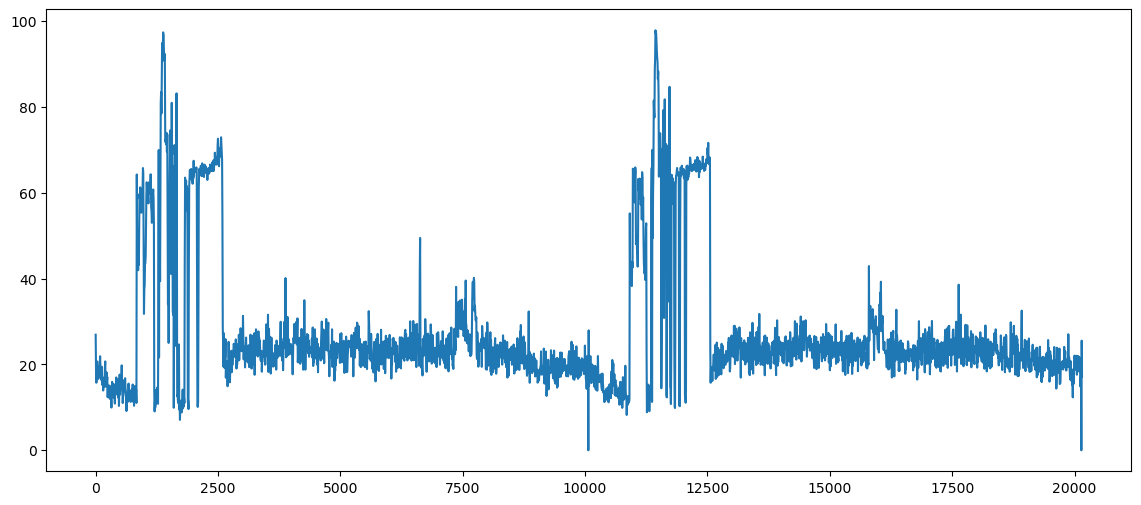

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df_a.cpu_01_busy[:2880])

In [8]:
train = pd.DataFrame(df_a[0:int(len(df_a)*0.70)])
validation = pd.DataFrame(df_a[int(len(df_a)*0.70): int(len(df_a)*0.80)])
test = pd.DataFrame(df_a[int(len(df_a)*0.80): int(len(df_a))])

print(train.shape)
print(validation.shape)
print(test.shape)

(17878, 3)
(2554, 3)
(5108, 3)


In [9]:
train.head()

,sample_time,m_id,cpu_01_busy
0,2010-11-24 00:01:00,a,26.92
7,2010-11-24 00:02:00,a,19.27
14,2010-11-24 00:03:00,a,15.73
21,2010-11-24 00:04:00,a,16.70
28,2010-11-24 00:05:00,a,20.57


In [10]:
train.iloc[:, -1]

0         26.92
7         19.27
14        15.73
21        16.70
28        20.57
          ...  
125111    23.62
125118    21.57
125125    20.37
125132    22.25
125139    20.55
Name: cpu_01_busy, Length: 17878, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, -1].values
validation_close = validation.iloc[:, -1].values
test_close = test.iloc[:,  -1].values

data_training_array = scaler.fit_transform(train_close.reshape(-1,1))
data_validation_array = scaler.fit_transform(validation_close.reshape(-1,1))
data_test_array = scaler.fit_transform(test_close.reshape(-1,1))

x_train = []
y_train = [] 

for i in range(200, data_training_array.shape[0]):
    x_train.append(data_training_array[i-200: i])
    y_train.append(data_training_array[i, 0])


x_valid = []
y_valid = [] 

for i in range(200, data_validation_array.shape[0]):
    x_valid.append(data_validation_array[i-200: i])
    y_valid.append(data_validation_array[i, 0])


x_test = []
y_test = [] 

for i in range(200, data_test_array.shape[0]):
    x_test.append(data_test_array[i-200: i])
    y_test.append(data_test_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train) 
x_valid, y_valid = np.array(x_valid), np.array(y_valid) 
x_test, y_test = np.array(x_test), np.array(y_test) 


In [12]:
x_valid.shape

(2354, 200, 1)

In [13]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\TuhinBanerjee\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_valid, y_valid) ,epochs = 50, callbacks = [early_stop])


Epoch 1/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 162s 282ms/step - MAE: 0.0880 - loss: 0.0196 - val_MAE: 0.0601 - val_loss: 0.0091
Epoch 2/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 156s 281ms/step - MAE: 0.0572 - loss: 0.0091 - val_MAE: 0.0521 - val_loss: 0.0078
Epoch 3/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 155s 281ms/step - MAE: 0.0533 - loss: 0.0084 - val_MAE: 0.0508 - val_loss: 0.0073
Epoch 4/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 159s 287ms/step - MAE: 0.0492 - loss: 0.0074 - val_MAE: 0.0475 - val_loss: 0.0064
Epoch 5/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 157s 284ms/step - MAE: 0.0492 - loss: 0.0071 - val_MAE: 0.0421 - val_loss: 0.0059
Epoch 6/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 159s 288ms/step - MAE: 0.0463 - loss: 0.0063 - val_MAE: 0.0494 - val_loss: 0.0062
Epoch 7/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 157s 284ms/step - MAE: 0.0493 - loss: 0.0071 - val_MAE: 0.0451 - val_loss: 0.0058
Epoch 8/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 158s 285ms/step - MAE: 0.0474 - loss: 0.0067 - val_MAE: 0.0501 - val_loss: 0.0062
Epoch 9/50
553/553 ━━━━━

<Axes: >

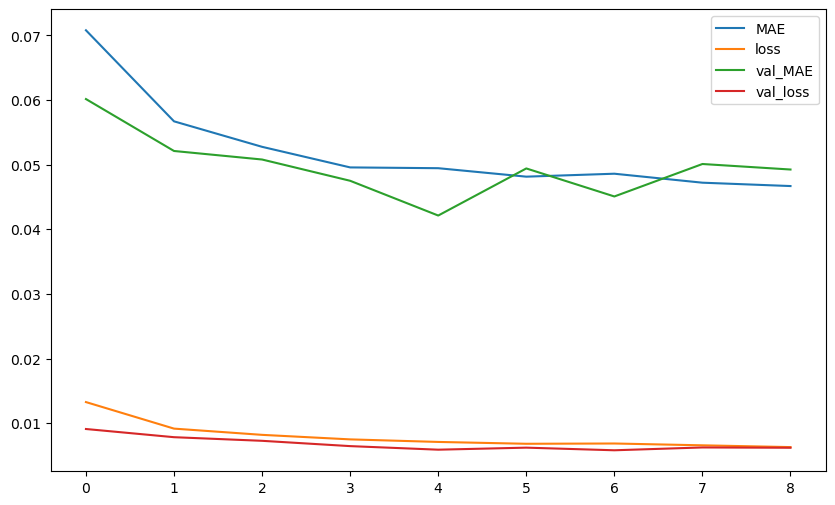

In [17]:
losses_df1 = pd.DataFrame(model.history.history)

losses_df1.plot(figsize = (10,6))


In [18]:
test_predictions1 = model.predict(x_test).flatten()


X_test_list = []
for i in range(len(x_test)):
    X_test_list.append(x_test[i][0])
    

test_predictions_df1 = pd.DataFrame({'y_test':y_test, 
                                    'LSTM Prediction':list(test_predictions1)})


154/154 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step


In [19]:
test_predictions_df1

,y_test,LSTM Prediction
0,0.290996,0.298627
1,0.333877,0.287083
2,0.264616,0.287360
3,0.301691,0.274883
4,0.283153,0.270136
...,...,...
4903,0.211550,0.184900
4904,0.176207,0.186275
4905,0.183540,0.186952
4906,0.154512,0.187161


<Axes: >

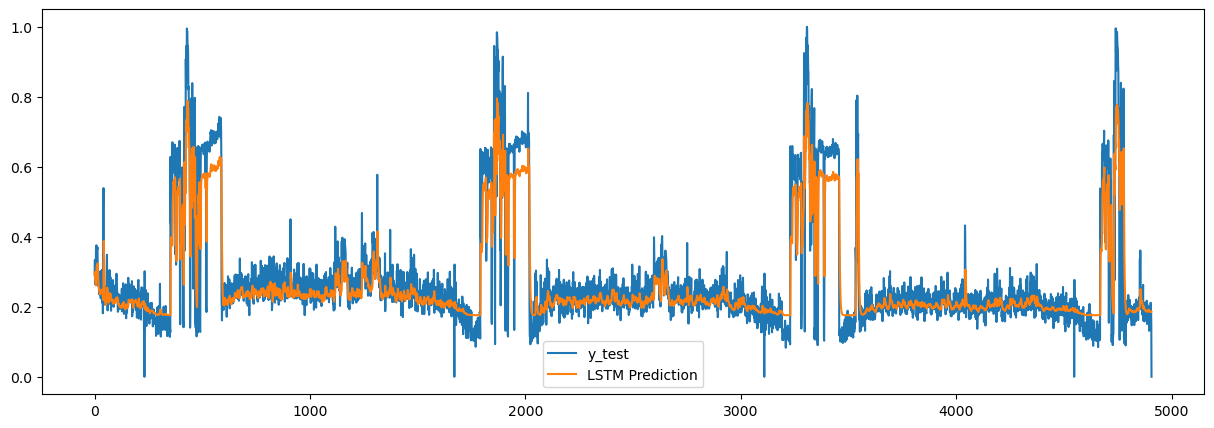

In [20]:
test_predictions_df1.plot(figsize=(15,5))

<Axes: >

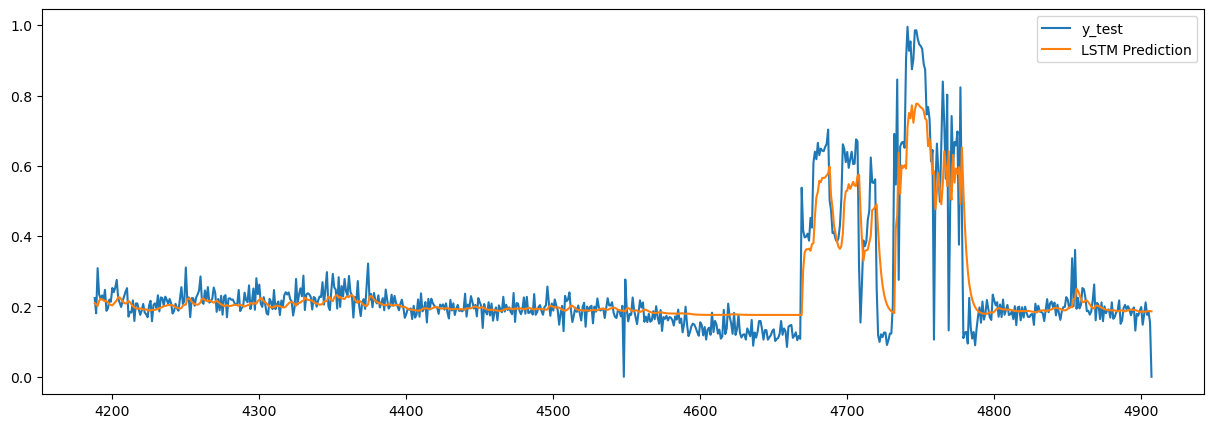

In [21]:
test_predictions_df1[(len(y_test) - 720):].plot(figsize = (15,5))